#### Evaluation Project - 7

## Loan Application Status Prediction

##### Problem Statement:

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

##### Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

##### Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

In [1]:
# Importing required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read the datafiles and loading the datasets,trying to understand the data.

df=pd.read_csv('loan_prediction.csv') 
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
# Drop irrelavent columns
df.drop(['Loan_ID'],axis=1,inplace=True)

In [4]:
#knowing the shape of the datasets
df.shape

(614, 12)

They are 614 rows and 12 columns is their in the dataset.

In [5]:
#finding the datatypes of each of the columns.
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

#### Key observation :
- 1 integer, 7 object and 4 float variable present in dataset.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [7]:
# Checking any null value present in dataset

df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### Replacing null values with mean and mode values

In [8]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())

In [9]:
#Filling Null Values

df['Dependents'].fillna(value=df['Dependents'].mode()[0],inplace=True)
df['Gender'].fillna(value=df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(value=df['Married'].mode()[0],inplace=True)
df['Self_Employed'].fillna(value=df['Self_Employed'].mode()[0],inplace=True)

In [10]:
print(df.isnull().sum())

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


No null values are present in the dataset.

### Exploratory Data Analysis (EDA)

#### Summary Statistics

In [12]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


#### Data Visualization
To check missing values

<AxesSubplot:>

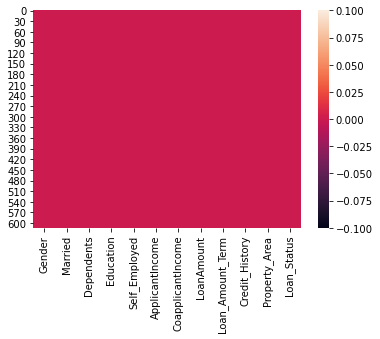

In [13]:
sns.heatmap(df.isnull())

Using Visualizing data plot to re-check null value and heatmap plot is showing their is no null value present in the dataset

#### Data analysing 

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

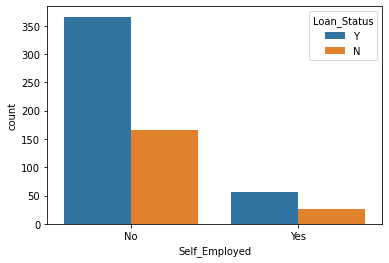

In [14]:
sns.countplot(x='Self_Employed',hue='Loan_Status',data=df)

Most of the data we have from not employed person Here we see if the person is not self employed there is high chances of approval

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

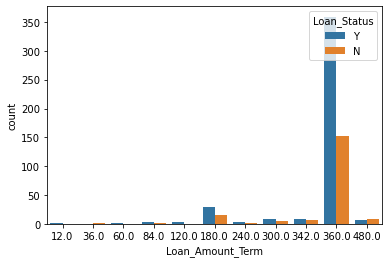

In [15]:
sns.countplot(x='Loan_Amount_Term',hue='Loan_Status',data=df)

Most of the people who applied for loan asked for 360 months of term more half are getting approved People those are taking loan for 480 months, most of them are getting approval

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

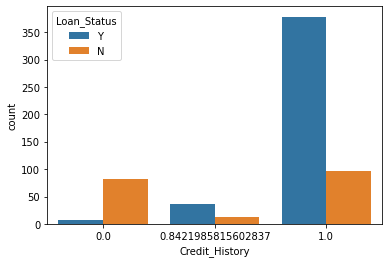

In [16]:
sns.countplot(x='Credit_History',hue='Loan_Status',data=df)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

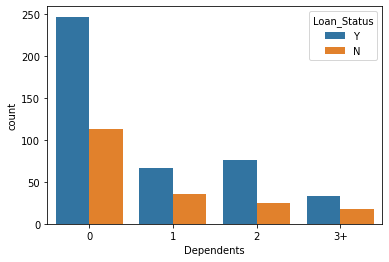

In [17]:
sns.countplot(x='Dependents',hue='Loan_Status',data=df)

We can notice people those are not having dependents are getting chances of Loan approval

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

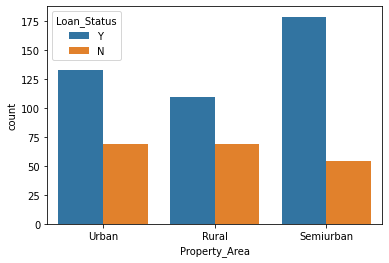

In [18]:
sns.countplot(x='Property_Area',hue='Loan_Status',data=df)

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

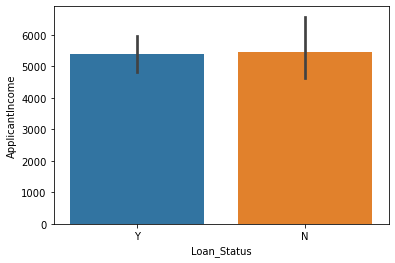

In [19]:
sns.barplot(y='ApplicantIncome',x='Loan_Status',data=df)

<AxesSubplot:xlabel='Loan_Status', ylabel='CoapplicantIncome'>

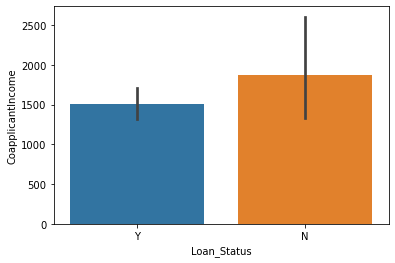

In [20]:
sns.barplot(y='CoapplicantIncome',x='Loan_Status',data=df)

<AxesSubplot:>

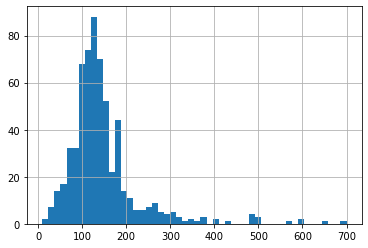

In [21]:
df['LoanAmount'].hist(bins=50)

In [22]:
df_corr=df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
df_corr

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,-0.364569,-0.172914,-0.045364,0.000525,0.005853,-0.172693,0.030239,-0.031319,0.031121,0.082045,0.017987
Married,-0.364569,1.000000,0.334216,0.012304,0.004489,-0.003163,0.233224,0.003281,0.028283,0.031057,0.003071,-0.091478
Dependents,-0.172914,0.334216,1.000000,0.055752,0.056798,0.079403,-0.007295,0.053924,0.056024,0.000862,0.001781,-0.010118
Education,-0.045364,0.012304,0.055752,1.000000,-0.010383,0.073543,0.084689,-0.072995,0.078645,0.069148,-0.003592,0.085884
Self_Employed,0.000525,0.004489,0.056798,-0.010383,1.000000,0.005906,-0.080509,-0.008925,0.008366,0.005927,0.021996,0.003700
ApplicantIncome,0.005853,-0.003163,0.079403,0.073543,0.005906,1.000000,0.378095,0.365594,-0.013189,0.036718,0.078590,-0.018675
CoapplicantIncome,-0.172693,0.233224,-0.007295,0.084689,-0.080509,0.378095,1.000000,0.203701,0.060137,0.051218,0.018346,-0.084419
LoanAmount,0.030239,0.003281,0.053924,-0.072995,-0.008925,0.365594,0.203701,1.000000,0.020456,0.045040,0.114591,0.040160
Loan_Amount_Term,-0.031319,0.028283,0.056024,0.078645,0.008366,-0.013189,0.060137,0.020456,1.000000,0.075963,-0.066941,0.085191
Credit_History,0.031121,0.031057,0.000862,0.069148,0.005927,0.036718,0.051218,0.045040,0.075963,1.000000,-0.058622,0.280181


<AxesSubplot:>

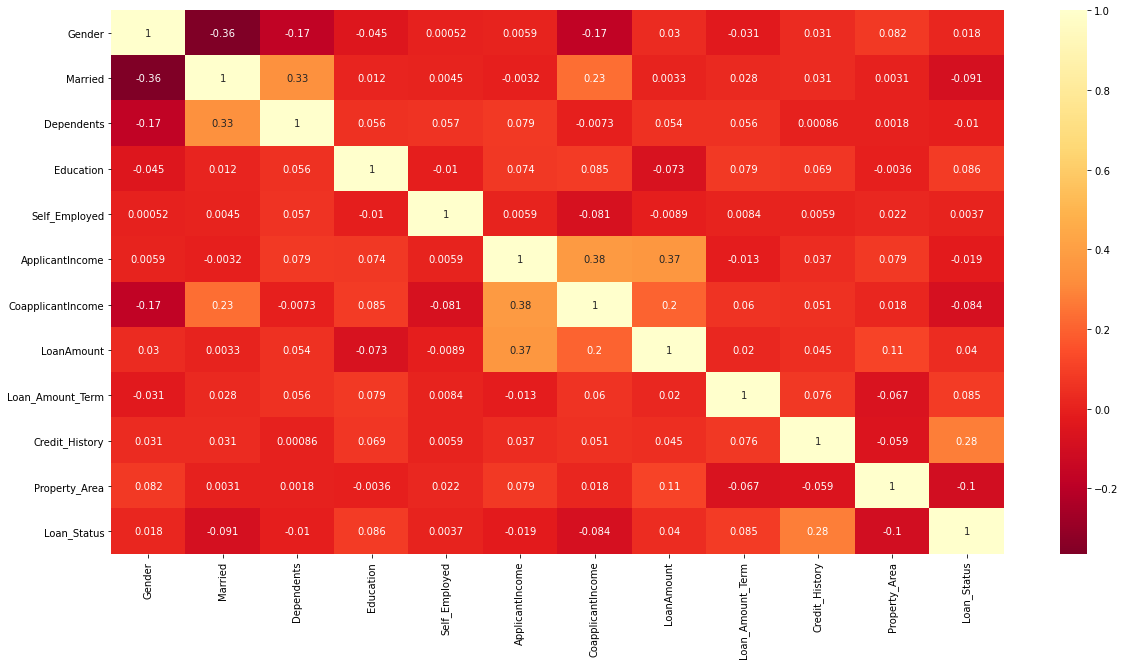

In [23]:
plt.figure(figsize=(20,10))
sns.heatmap(df_corr,cmap='YlOrRd_r',annot=True)

In [24]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#### Encoding

In [25]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Education']=LE.fit_transform(df['Education'])
df['Gender']=LE.fit_transform(df['Gender'])
df['Married']=LE.fit_transform(df['Married'])
df['Dependents']=LE.fit_transform(df['Dependents'])
df['Self_Employed']=LE.fit_transform(df['Self_Employed'])
df['Property_Area']=LE.fit_transform(df['Property_Area'])
df['Loan_Status']=LE.fit_transform(df['Loan_Status'])

<AxesSubplot:xlabel='Gender', ylabel='Density'>

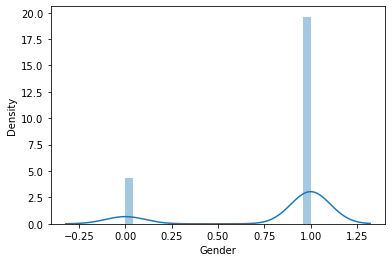

In [26]:
sns.distplot(df['Gender'] )

<AxesSubplot:xlabel='Married', ylabel='Density'>

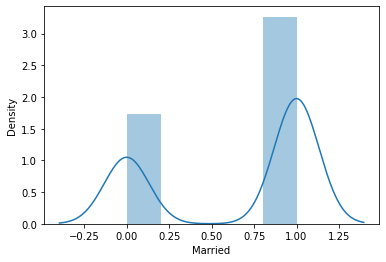

In [27]:
sns.distplot(df['Married'] )

<AxesSubplot:xlabel='Dependents', ylabel='Density'>

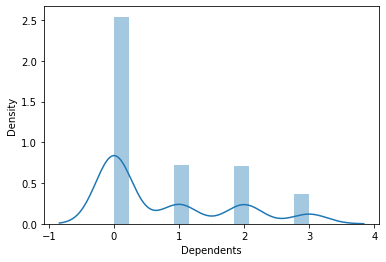

In [28]:
sns.distplot(df['Dependents'] )

<AxesSubplot:xlabel='Education', ylabel='Density'>

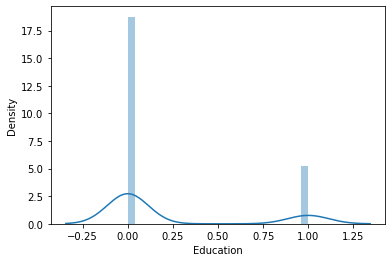

In [29]:
sns.distplot(df['Education'] )

<AxesSubplot:xlabel='Self_Employed', ylabel='Density'>

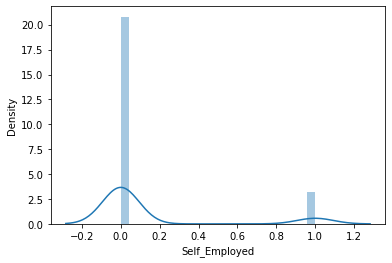

In [30]:
sns.distplot(df['Self_Employed'] )

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

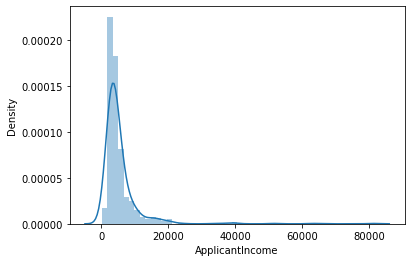

In [31]:
sns.distplot(df['ApplicantIncome'] )

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

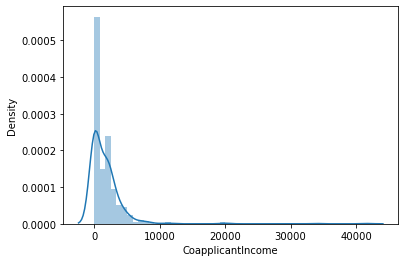

In [32]:
sns.distplot(df['CoapplicantIncome'] )

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

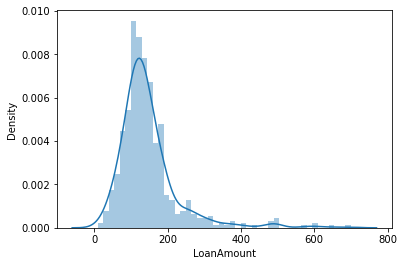

In [33]:
sns.distplot(df['LoanAmount'] )

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

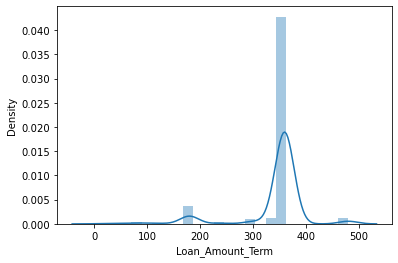

In [34]:
sns.distplot(df['Loan_Amount_Term'] )

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

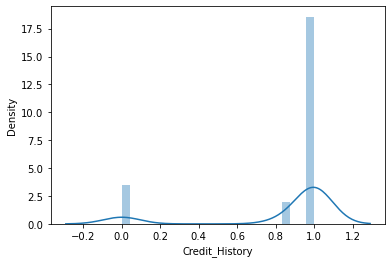

In [35]:
sns.distplot(df['Credit_History'] )

<AxesSubplot:xlabel='Property_Area', ylabel='Density'>

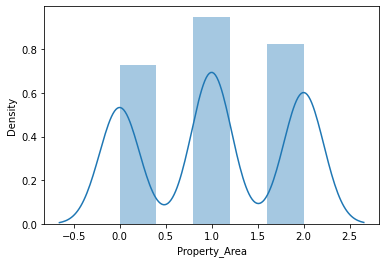

In [36]:
sns.distplot(df['Property_Area'] )

<AxesSubplot:xlabel='Loan_Status', ylabel='Density'>

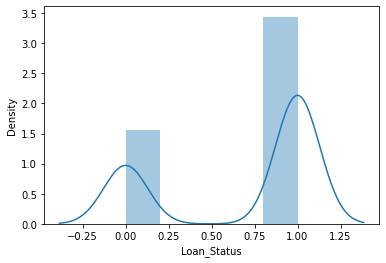

In [37]:
sns.distplot(df['Loan_Status'] )

<AxesSubplot:xlabel='Gender'>

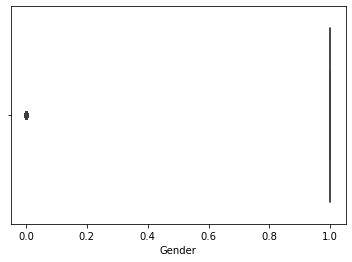

In [38]:
sns.boxplot(df['Gender'] )

<AxesSubplot:xlabel='Married'>

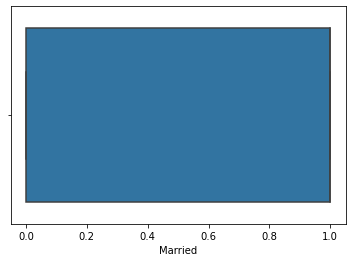

In [39]:
sns.boxplot(df['Married'] )

<AxesSubplot:xlabel='Dependents'>

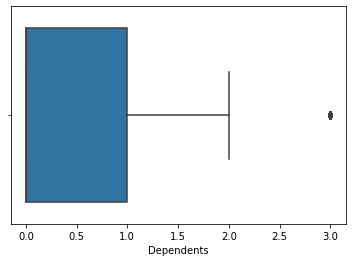

In [40]:
sns.boxplot(df['Dependents'] )

<AxesSubplot:xlabel='Education'>

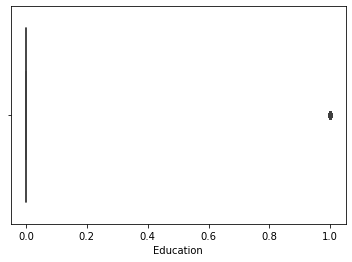

In [41]:
sns.boxplot(df['Education'] )

<AxesSubplot:xlabel='Self_Employed'>

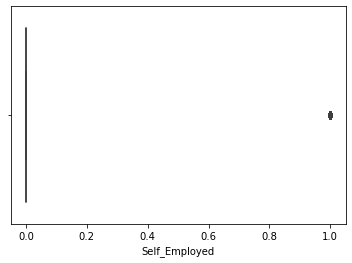

In [42]:
sns.boxplot(df['Self_Employed'] )

<AxesSubplot:xlabel='ApplicantIncome'>

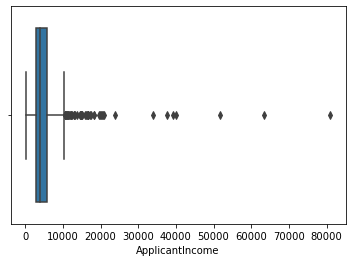

In [43]:
sns.boxplot(df['ApplicantIncome'] )

<AxesSubplot:xlabel='CoapplicantIncome'>

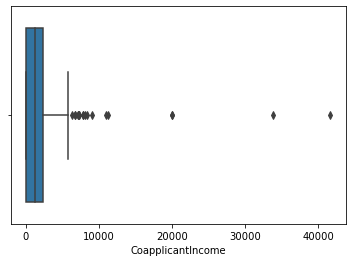

In [44]:
sns.boxplot(df['CoapplicantIncome'] )

<AxesSubplot:xlabel='LoanAmount'>

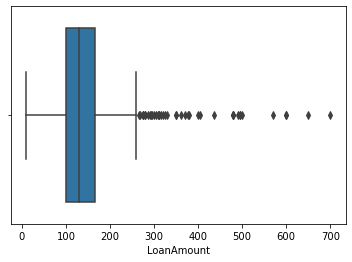

In [45]:
sns.boxplot(df['LoanAmount'] )

<AxesSubplot:xlabel='Loan_Amount_Term'>

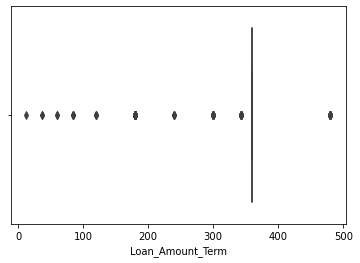

In [46]:
sns.boxplot(df['Loan_Amount_Term'] )

<AxesSubplot:xlabel='Credit_History'>

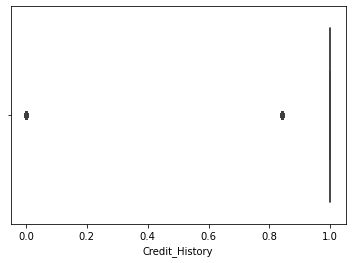

In [47]:
sns.boxplot(df['Credit_History'] )

<AxesSubplot:xlabel='Property_Area'>

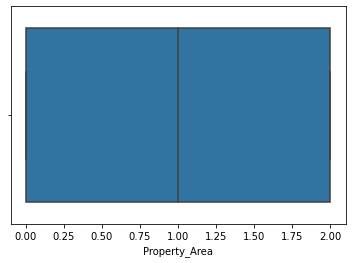

In [48]:
sns.boxplot(df['Property_Area'] )

<AxesSubplot:xlabel='Loan_Status'>

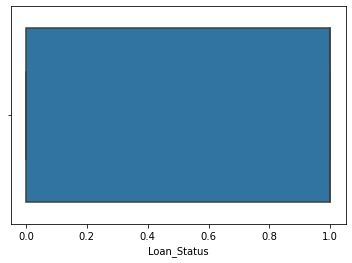

In [49]:
sns.boxplot(df['Loan_Status'] )

#### Removing outlier from Data

In [50]:
z=np.abs(zscore(df))
z

array([[0.47234264, 1.37208932, 0.73780632, ..., 0.45164045, 1.22329839,
        0.67451931],
       [0.47234264, 0.72881553, 0.25346957, ..., 0.45164045, 1.31851281,
        1.48253724],
       [0.47234264, 0.72881553, 0.73780632, ..., 0.45164045, 1.22329839,
        0.67451931],
       ...,
       [0.47234264, 0.72881553, 0.25346957, ..., 0.45164045, 1.22329839,
        0.67451931],
       [0.47234264, 0.72881553, 1.24474546, ..., 0.45164045, 1.22329839,
        0.67451931],
       [2.11710719, 1.37208932, 0.73780632, ..., 2.41044061, 0.04760721,
        1.48253724]])

In [51]:
threashold=3
print(np.where(z>3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604], dtype=int64), array([6, 8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 8, 5, 7,
       7, 6, 5, 6, 7, 5, 7, 8, 8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7],
      dtype=int64))


In [52]:
df_new=df[(z<3).all(axis=1)]

In [53]:
df.shape

(614, 12)

In [54]:
# Checking shape of new dataset
df_new.shape

(577, 12)

In [55]:
# Data loss

loss_percent=(614-577)/614*100
loss_percent

6.026058631921824

In [56]:
df_new

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


### Splitting Data into Two parts namely X and Y

In [57]:
x = df.drop("Loan_Status", axis=1)
y = df["Loan_Status"]
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2


In [58]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

#### Transforming Data to Remove Skewness:

In [59]:
x.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
Property_Area       -0.066196
dtype: float64

In [60]:
from sklearn.preprocessing import power_transform

In [62]:
x=power_transform(x,method='yeo-johnson')
x

array([[ 0.47234264, -1.37208932, -0.83635158, ...,  0.18197526,
         0.54067335,  1.23109454],
       [ 0.47234264,  0.72881553,  1.01480732, ...,  0.18197526,
         0.54067335, -1.3095612 ],
       [ 0.47234264,  0.72881553, -0.83635158, ...,  0.18197526,
         0.54067335,  1.23109454],
       ...,
       [ 0.47234264,  0.72881553,  1.01480732, ...,  0.18197526,
         0.54067335,  1.23109454],
       [ 0.47234264,  0.72881553,  1.26700933, ...,  0.18197526,
         0.54067335,  1.23109454],
       [-2.11710719, -1.37208932, -0.83635158, ...,  0.18197526,
        -1.89839153, -0.0612431 ]])

In [63]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.47234264, -1.37208932, -0.83635158, ...,  0.18197526,
         0.54067335,  1.23109454],
       [ 0.47234264,  0.72881553,  1.01480732, ...,  0.18197526,
         0.54067335, -1.3095612 ],
       [ 0.47234264,  0.72881553, -0.83635158, ...,  0.18197526,
         0.54067335,  1.23109454],
       ...,
       [ 0.47234264,  0.72881553,  1.01480732, ...,  0.18197526,
         0.54067335,  1.23109454],
       [ 0.47234264,  0.72881553,  1.26700933, ...,  0.18197526,
         0.54067335,  1.23109454],
       [-2.11710719, -1.37208932, -0.83635158, ...,  0.18197526,
        -1.89839153, -0.0612431 ]])

In [64]:
len(x)
len(y)

614

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.metrics import accuracy_score

In [66]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=i,test_size=0.7)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state", i,"The model perform very well")
        print("At random_state:-",i)
        print("Training accuracy score is ", round(accuracy_score(y_train,pred_train)*100,1))
        print("Training accuracy score is ", round(accuracy_score(y_test,pred_test)*100,1), '\n')

At random state 361 The model perform very well
At random_state:- 361
Training accuracy score is  77.2
Training accuracy score is  77.2 

At random state 362 The model perform very well
At random_state:- 362
Training accuracy score is  77.2
Training accuracy score is  77.2 

At random state 433 The model perform very well
At random_state:- 433
Training accuracy score is  77.2
Training accuracy score is  77.2 



In [67]:
x_train,y_test,y_train,y_test=train_test_split(x,y,test_size=.70,random_state=43)

In [68]:
from sklearn.metrics import classification_report

In [69]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.35      0.26      0.30       129
           1       0.71      0.80      0.75       301

    accuracy                           0.63       430
   macro avg       0.53      0.53      0.52       430
weighted avg       0.61      0.63      0.62       430



In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

dt=DecisionTreeClassifier()
dt.fit(x_train, y_train)
preddt = dt.predict(x_test)
print("Accuracy", accuracy_score(y_test, preddt)*100)
print(confusion_matrix(y_test, preddt))
print(classification_report(y_test, preddt))

Accuracy 56.97674418604651
[[ 42  87]
 [ 98 203]]
              precision    recall  f1-score   support

           0       0.30      0.33      0.31       129
           1       0.70      0.67      0.69       301

    accuracy                           0.57       430
   macro avg       0.50      0.50      0.50       430
weighted avg       0.58      0.57      0.57       430



#### GaussianNB Classifier

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [72]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.22,random_state=43)

In [73]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predict_gnb=gnb.predict(x_test)
print(accuracy_score(y_test,predict_gnb))
print(confusion_matrix(y_test,predict_gnb))
print(classification_report(y_test,predict_gnb))

0.7573529411764706
[[19 22]
 [11 84]]
              precision    recall  f1-score   support

           0       0.63      0.46      0.54        41
           1       0.79      0.88      0.84        95

    accuracy                           0.76       136
   macro avg       0.71      0.67      0.69       136
weighted avg       0.74      0.76      0.75       136



#### KNeighbors Classifier

In [74]:
from sklearn.neighbors import KNeighborsClassifier

In [75]:
kmn=KNeighborsClassifier(n_neighbors=5)
kmn.fit(x_train,y_train)
kmn.score(x_train,y_train)
pred_kmn=kmn.predict(x_test)
print(accuracy_score(y_test,pred_kmn))
print(confusion_matrix(y_test,pred_kmn))
print(classification_report(y_test,pred_kmn))

0.7279411764705882
[[17 24]
 [13 82]]
              precision    recall  f1-score   support

           0       0.57      0.41      0.48        41
           1       0.77      0.86      0.82        95

    accuracy                           0.73       136
   macro avg       0.67      0.64      0.65       136
weighted avg       0.71      0.73      0.71       136



#### Support Vector Classifier

In [76]:
from sklearn.svm import SVC
svc=SVC(kernel='linear')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
pred_svc=svc.predict(x_test)
print(accuracy_score(y_test,pred_kmn))
print(confusion_matrix(y_test,pred_kmn))
print(classification_report(y_test,pred_kmn))

0.7279411764705882
[[17 24]
 [13 82]]
              precision    recall  f1-score   support

           0       0.57      0.41      0.48        41
           1       0.77      0.86      0.82        95

    accuracy                           0.73       136
   macro avg       0.67      0.64      0.65       136
weighted avg       0.71      0.73      0.71       136



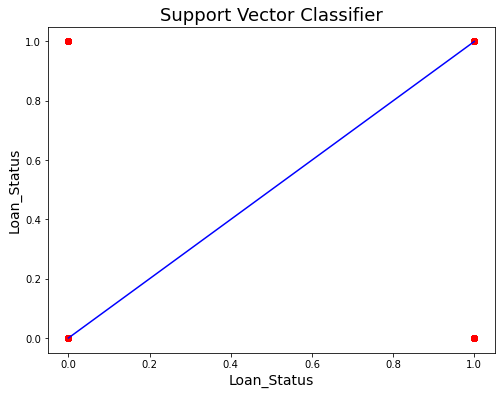

In [79]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_svc, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Loan_Status',fontsize=14)
plt.ylabel('Loan_Status',fontsize=14)
plt.title('Support Vector Classifier',fontsize=18)
plt.show()

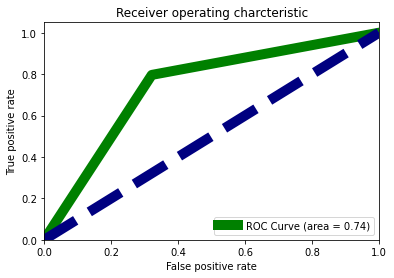

In [80]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(pred_svc, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color = 'green', lw=10, label = 'ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1],color='navy', lw=10, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating charcteristic')
plt.legend(loc="lower right")
plt.show()

### Model Saving:

In [81]:
import pickle
filename = 'Loan_application_prediction.pkl'
pickle.dump(lr, open(filename,'wb'))